# Regrsion lineal una variable

Number of training examples: 97
First 5 examples from the dataset:
Population: 6.1101, Profit: 17.592
Population: 5.5277, Profit: 9.1302
Population: 8.5186, Profit: 13.662
Population: 7.0032, Profit: 11.854
Population: 5.8598, Profit: 6.8233


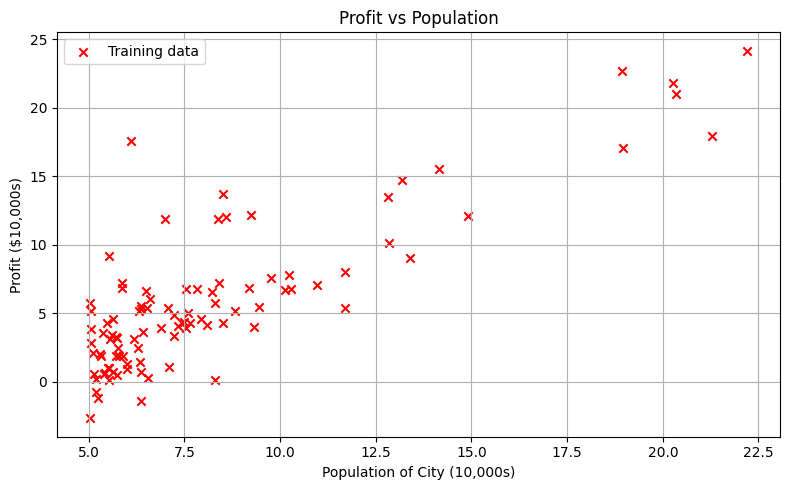

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from a text file (make sure to upload 'ex1data1.txt' to Colab first)
data = np.loadtxt('/content/ex1data1.txt', delimiter=',')

# Separate the data into input feature X and output target y
X = data[:, 0]  # Population of city (in 10,000s)
y = data[:, 1]  # Profit (in $10,000s)

# Print basic info about the dataset
print(f"Number of training examples: {len(y)}")
print("First 5 examples from the dataset:")
for i in range(5):
    print(f"Population: {X[i]}, Profit: {y[i]}")

# Create a scatter plot to visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, marker='x', color='red', label='Training data')
plt.title('Profit vs Population')
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Optimized theta values: [-3.63029144  1.16636235]
Initial cost with theta = [0, 0]: 32.072733877455676
Final cost: 4.483388256587725


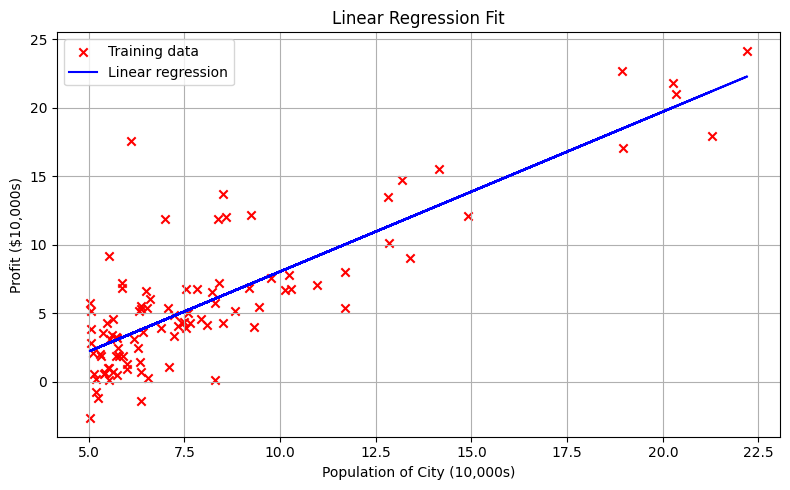

In [ ]:
# Add a column of ones to X to account for the intercept term
m = len(y)  # Number of training examples
X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)

# Initialize fitting parameters (theta0 and theta1)
theta = np.zeros(2)

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors, errors)
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1500  # Number of iterations

# Run gradient descent
theta, J_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Compute cost with initial theta = [0, 0]
initial_cost = compute_cost(X_b, y, np.zeros(2))


# Print the optimized theta values
print(f"Optimized theta values: {theta}")
print(f"Initial cost with theta = [0, 0]: {initial_cost}")
print(f"Final cost: {J_history[-1]}")

# Plot the linear regression line with the training data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, marker='x', color='red', label='Training data')
plt.plot(X, X_b.dot(theta), color='blue', label='Linear regression')
plt.title('Linear Regression Fit')
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

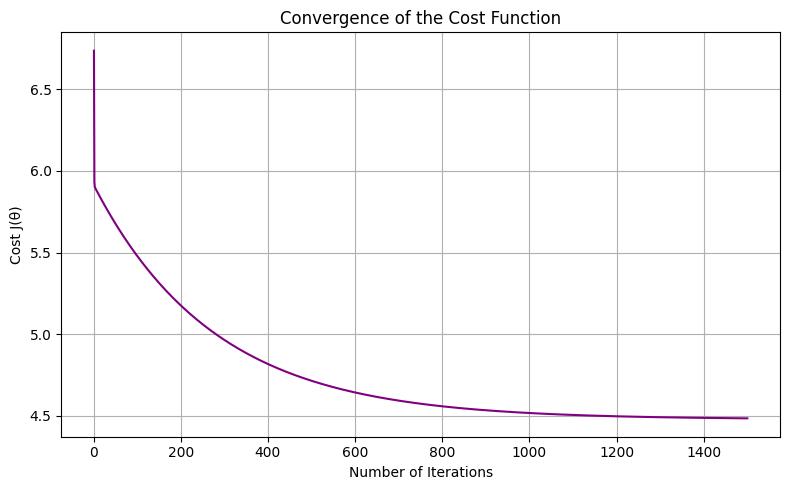

In [ ]:
# Plot the cost function value over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(J_history) + 1), J_history, color='purple')
plt.title('Convergence of the Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict profit for populations of 35,000 and 70,000
def predict(population, theta):
    """
    Predict the profit for a given population using learned theta.
    population: float, in units of actual people (e.g. 35000)
    """
    x = population / 10000  # convert to 10,000s
    x_vec = np.array([1, x])  # include bias term
    return x_vec.dot(theta)

profit_35k = predict(35000, theta)
profit_70k = predict(70000, theta)

print(f"Predicted profit for a city with 35,000 people: ${profit_35k * 10000:.2f}")
print(f"Predicted profit for a city with 70,000 people: ${profit_70k * 10000:.2f}")

Predicted profit for a city with 35,000 people: $4519.77
Predicted profit for a city with 70,000 people: $45342.45


# Visualization

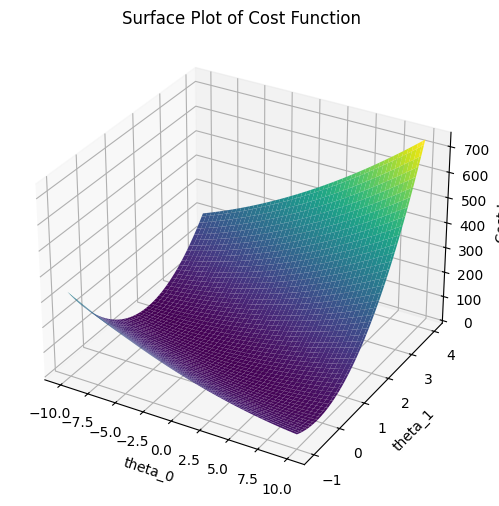

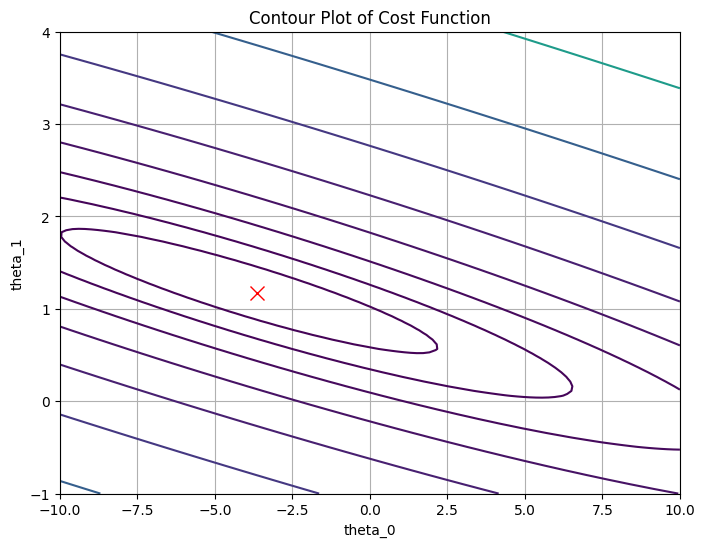

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create grid for theta_0 and theta_1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals as a matrix
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill in J_vals using nested loops
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X_b, y, t)

# Transpose for correct orientation
J_vals = J_vals.T

# Surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.title('Surface Plot of Cost Function')
plt.show()

# Contour plot
plt.figure(figsize=(8, 6))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)  # final theta
plt.title('Contour Plot of Cost Function')
plt.grid(True)
plt.show()